#### Importing Libraries

In [76]:
# Data manipulation and plotting modules
import os
import pandas as pd

# Data pre-processing
# Data splitting and model parameter search
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

# Hyperparameter optimization
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
import numpy as np
import pandas as pd
from time import time
import pprint
import joblib
import warnings
warnings.filterwarnings("ignore")

# Classifiers
from catboost import CatBoostClassifier

# Model selection
from sklearn.model_selection import StratifiedKFold

# Metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer

# Skopt functions
from skopt import BayesSearchCV
from skopt.callbacks import DeadlineStopper, VerboseCallback, DeltaXStopper
from skopt.space import Real, Categorical, Integer
from time import time

#     z = (x-mean)/stdev
from sklearn.preprocessing import StandardScaler as ss
# Dimensionality reduction and noise removal
from sklearn.decomposition import PCA
from xgboost.sklearn import XGBClassifier

# Model pipelining
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# Hyperparameter optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# For plotting
import matplotlib.pyplot as plt

# Model evaluation metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix

# Used in Randomized parameter search
from scipy.stats import uniform

# For data processing
from sklearn.preprocessing import StandardScaler
# For plotting
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

In [77]:
# Misc
import time
import os
import gc
import random

In [78]:
# From a cell display outputs from multiple commands:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [79]:
#Set option to display many rows
pd.set_option('display.max_columns', 100)


#### Reading Data 

In [80]:
# Go to folder containing data file

df_train_features = pd.read_csv("train_features.csv.zip",index_col='match_id_hash')

df_train_targets = pd.read_csv("train_targets.csv.zip",index_col='match_id_hash')

#### Data Overview and Visualisation

In [81]:
# To read first 5 rows of train_features data file
df_train_features.head(5)

,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,r1_gold,r1_lh,r1_xp,r1_health,r1_max_health,r1_max_mana,r1_level,r1_x,r1_y,r1_stuns,r1_creeps_stacked,r1_camps_stacked,r1_rune_pickups,r1_firstblood_claimed,r1_teamfight_participation,r1_towers_killed,r1_roshans_killed,r1_obs_placed,r1_sen_placed,r2_hero_id,r2_kills,r2_deaths,r2_assists,r2_denies,r2_gold,r2_lh,r2_xp,r2_health,r2_max_health,r2_max_mana,r2_level,r2_x,r2_y,r2_stuns,r2_creeps_stacked,r2_camps_stacked,r2_rune_pickups,r2_firstblood_claimed,r2_teamfight_participation,r2_towers_killed,...,d3_obs_placed,d3_sen_placed,d4_hero_id,d4_kills,d4_deaths,d4_assists,d4_denies,d4_gold,d4_lh,d4_xp,d4_health,d4_max_health,d4_max_mana,d4_level,d4_x,d4_y,d4_stuns,d4_creeps_stacked,d4_camps_stacked,d4_rune_pickups,d4_firstblood_claimed,d4_teamfight_participation,d4_towers_killed,d4_roshans_killed,d4_obs_placed,d4_sen_placed,d5_hero_id,d5_kills,d5_deaths,d5_assists,d5_denies,d5_gold,d5_lh,d5_xp,d5_health,d5_max_health,d5_max_mana,d5_level,d5_x,d5_y,d5_stuns,d5_creeps_stacked,d5_camps_stacked,d5_rune_pickups,d5_firstblood_claimed,d5_teamfight_participation,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed
match_id_hash,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,155,22,7,1,11,11,0,0,0,0,543,7,533,358,600,350.93784,2,116,122,0.000000,0,0,1,0,0.000000,0,0,0,0,78,0,0,0,3,399,4,478,636,720,254.93774,2,124,126,0.000000,0,0,0,0,0.000000,0,...,0,0,84,1,0,0,0,796,0,421,760,760,326.93780,2,90,150,0.000000,0,0,2,1,1.0,0,0,1,0,34,0,0,0,0,851,11,870,593,680,566.93805,3,128,128,0.000000,0,0,0,0,0.00,0,0,0,0
b9c57c450ce74a2af79c9ce96fac144d,658,4,0,3,10,15,7,2,0,7,5257,52,3937,1160,1160,566.93805,8,76,78,0.000000,0,0,0,0,0.437500,0,0,0,0,96,3,1,2,3,3394,19,3897,1352,1380,386.93787,8,78,166,8.397949,0,0,4,0,0.312500,0,...,0,0,56,0,3,2,3,2808,18,2730,567,1160,410.93790,6,124,142,0.000000,0,0,6,0,0.5,0,0,0,0,92,0,2,0,1,1423,8,1136,800,800,446.93793,4,180,176,0.000000,0,0,0,0,0.00,0,0,0,0
6db558535151ea18ca70a6892197db41,21,23,0,0,0,101,0,0,0,0,176,0,0,680,680,506.93800,1,118,118,0.000000,0,0,0,0,0.000000,0,0,0,0,51,0,0,0,0,176,0,0,720,720,278.93777,1,156,104,0.000000,0,0,0,0,0.000000,0,...,0,0,40,0,0,0,0,96,0,0,600,600,302.93777,1,176,110,0.000000,0,0,0,0,0.0,0,0,0,0,17,0,0,0,0,96,0,0,640,640,446.93793,1,162,162,0.000000,0,0,0,0,0.00,0,0,0,0
46a0ddce8f7ed2a8d9bd5edcbb925682,576,22,7,1,4,14,1,0,3,1,1613,0,1471,900,900,290.93777,4,170,96,2.366089,0,0,5,0,0.571429,0,0,0,0,99,1,0,1,2,2816,30,3602,878,1100,494.93796,8,82,154,0.000000,0,0,1,0,0.285714,0,...,0,0,69,0,2,0,0,2004,16,1644,1160,1160,386.93787,4,176,100,4.998863,0,0,2,0,0.0,0,0,0,0,86,0,1,0,1,1333,2,1878,630,740,518.93800,5,82,160,8.664527,3,1,3,0,0.00,0,0,2,0
b1b35ff97723d9b7ade1c9c3cf48f770,453,22,7,1,3,42,0,1,1,0,1404,9,1351,1000,1000,338.93784,4,80,164,9.930903,0,0,4,0,0.500000,0,0,0,0,69,1,0,0,0,1840,14,1693,868,1000,350.93784,5,78,166,1.832892,0,0,0,1,0.500000,0,...,0,0,72,2,1,0,0,1697,12,1651,680,680,374.93787,4,176,108,13.596678,0,0,2,0,0.5,0,0,0,0,1,0,1,1,8,2199,32,1919,692,740,302.93777,5,104,162,0.000000,2,1,2,0,0.25,0,0,0,0


In [50]:
# To read first 5 rows of train_targets data file

df_train_targets.head(5)

,game_time,radiant_win,duration,time_remaining,next_roshan_team
match_id_hash,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,155,False,992,837,NaN
b9c57c450ce74a2af79c9ce96fac144d,658,True,1154,496,NaN
6db558535151ea18ca70a6892197db41,21,True,1503,1482,Radiant
46a0ddce8f7ed2a8d9bd5edcbb925682,576,True,1952,1376,NaN
b1b35ff97723d9b7ade1c9c3cf48f770,453,False,2001,1548,NaN


In [8]:
# To check train_features data file size

df_train_features.shape


(39675, 245)

In [9]:
# To check train_targets data file size

df_train_targets.shape


(39675, 5)

In [10]:
# To Examine train_features data statistics

df_train_features.describe()

,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,r1_gold,r1_lh,r1_xp,r1_health,r1_max_health,r1_max_mana,r1_level,r1_x,r1_y,r1_stuns,r1_creeps_stacked,r1_camps_stacked,r1_rune_pickups,r1_firstblood_claimed,r1_teamfight_participation,r1_towers_killed,r1_roshans_killed,r1_obs_placed,r1_sen_placed,r2_hero_id,r2_kills,r2_deaths,r2_assists,r2_denies,r2_gold,r2_lh,r2_xp,r2_health,r2_max_health,r2_max_mana,r2_level,r2_x,r2_y,r2_stuns,r2_creeps_stacked,r2_camps_stacked,r2_rune_pickups,r2_firstblood_claimed,r2_teamfight_participation,r2_towers_killed,...,d3_obs_placed,d3_sen_placed,d4_hero_id,d4_kills,d4_deaths,d4_assists,d4_denies,d4_gold,d4_lh,d4_xp,d4_health,d4_max_health,d4_max_mana,d4_level,d4_x,d4_y,d4_stuns,d4_creeps_stacked,d4_camps_stacked,d4_rune_pickups,d4_firstblood_claimed,d4_teamfight_participation,d4_towers_killed,d4_roshans_killed,d4_obs_placed,d4_sen_placed,d5_hero_id,d5_kills,d5_deaths,d5_assists,d5_denies,d5_gold,d5_lh,d5_xp,d5_health,d5_max_health,d5_max_mana,d5_level,d5_x,d5_y,d5_stuns,d5_creeps_stacked,d5_camps_stacked,d5_rune_pickups,d5_firstblood_claimed,d5_teamfight_participation,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed
count,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,...,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000,39675.000000
mean,1146.082798,19.584776,4.772350,6.524865,7.338500,51.103138,3.147876,3.268809,4.670170,6.289628,7193.676673,64.953472,8292.432313,944.125696,1318.476774,720.572416,11.304398,121.169956,119.158362,11.777784,0.785583,0.263037,4.342382,0.091493,0.419499,0.338273,0.029515,1.204058,0.762697,51.379912,3.101979,3.297190,4.741626,6.198715,7088.081336,62.724587,8227.643453,945.517152,1312.439950,720.862347,11.260113,121.370233,118.986415,12.173502,0.797328,0.262054,4.281159,0.091544,0.422217,0.332829,...,1.257568,0.789817,51.291292,3.151758,3.234833,4.716698,6.320302,7136.968948,64.226667,8301.341248,946.622432,1318.541424,722.455569,11.293938,132.035992,133.505079,11.736520,0.989011,0.327940,4.610132,0.090788,0.418544,0.310271,0.026717,1.234304,0.752665,51.326251,3.079471,3.283428,4.722899,6.087259,7072.353472,62.929754,8229.593724,941.752187,1311.677832,720.190588,11.238513,132.349994,133.457290,11.773324,1.039017,0.343138,4.683907,0.090132,0.415961,0.299811,0.024423,1.269288,0.783289
std,767.206621,6.304976,3.260582,6.492107,13.366381,34.603057,3.724282,3.283323,5.225349,8.203957,6507.500421,76.937899,7483.974613,682.006870,624.255007,406.427986,6.795845,34.374926,28.552563,20.509191,2.772321,0.768956,4.315683,0.288313,0.267528,0.771640,0.185585,2.482677,2.367616,34.306668,3.633224,3.315024,5.275771,8.087597,6355.575365,74.483563,7415.179946,679.166854,618.309272,402.629875,6.753347,34.546639,28.589505,20.872242,2.857442,0.773099,4.29

In [11]:
# To Examine train_targets data statistics

df_train_targets.describe()

,game_time,duration,time_remaining
count,39675.000000,39675.000000,39675.000000
mean,1146.082798,2328.413711,1182.330914
std,767.206621,671.803393,770.779229
min,0.000000,901.000000,31.000000
25%,521.000000,1872.500000,554.000000
50%,1044.000000,2270.000000,1087.000000
75%,1656.000000,2746.000000,1694.000000
max,4933.000000,5638.000000,5108.000000


In [12]:
# To Have a look at the train_features data

df_train_features.dtypes
print("\n------\n")
df_train_features.dtypes.value_counts()

game_time                       int64
game_mode                       int64
lobby_type                      int64
objectives_len                  int64
chat_len                        int64
                               ...   
d5_teamfight_participation    float64
d5_towers_killed                int64
d5_roshans_killed               int64
d5_obs_placed                   int64
d5_sen_placed                   int64
Length: 245, dtype: object


------



int64      215
float64     30
dtype: int64

In [13]:
# To Have a look at the train_targets data

df_train_targets.dtypes
print("\n------\n")
df_train_targets.dtypes.value_counts()

game_time            int64
radiant_win           bool
duration             int64
time_remaining       int64
next_roshan_team    object
dtype: object


------



int64     3
object    1
bool      1
dtype: int64

In [14]:
# Exploring radiant_win from train_target dataset

df_train_targets['radiant_win'].value_counts()

True     20826
False    18849
Name: radiant_win, dtype: int64

In [15]:
# label encoding radiant_win data

target = pd.Series(df_train_targets['radiant_win'].map({True: 1, False: 0}))

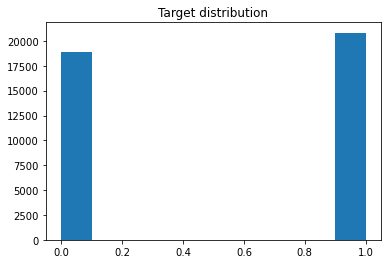

In [16]:
# Data visualization
# Histrogram plotting

plt.hist(target);
plt.title('Target distribution');

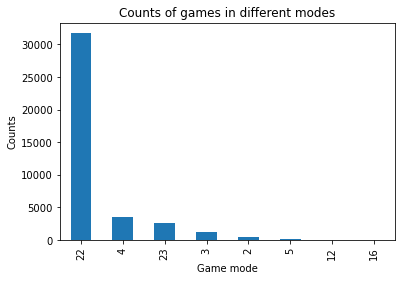

In [17]:
# Bar graph for Game mode vs Counts from Train_features data

ax = df_train_features['game_mode'].value_counts().plot(kind='bar', title='Counts of games in different modes');
ax.set_xlabel("Game mode");
ax.set_ylabel("Counts");

Text(0.5, 1.0, 'Correlation Factors Heat Map')

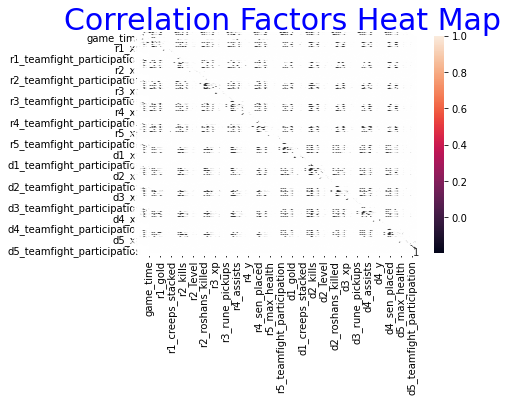

In [82]:
sns.heatmap(df_train_features.corr(), annot=True).set_title('Correlation Factors Heat Map', color='blue', size='30')

In [18]:
## For finding different game_mode and their counts from train_features data

train_modes = df_train_features['game_mode'].value_counts().reset_index().rename(columns={'index': 'game_mode', 'game_mode': 'count'})
train_modes

,game_mode,count
0,22,31762
1,4,3564
2,23,2546
3,3,1200
4,2,408
5,5,188
6,12,5
7,16,2


#### Feature Engineering 

In [19]:
# Create copy of DataFrame

df_train_targets_new = df_train_targets.copy()  

# Transform boolean to integer
df_train_targets_new['radiant_win'] = df_train_targets_new['radiant_win'].astype(int)              
print(df_train_targets_new) 


                                  game_time  radiant_win  duration  \
match_id_hash                                                        
a400b8f29dece5f4d266f49f1ae2e98a        155            0       992   
b9c57c450ce74a2af79c9ce96fac144d        658            1      1154   
6db558535151ea18ca70a6892197db41         21            1      1503   
46a0ddce8f7ed2a8d9bd5edcbb925682        576            1      1952   
b1b35ff97723d9b7ade1c9c3cf48f770        453            0      2001   
...                                     ...          ...       ...   
defd0caeed6ea83d7d5fbdec013fe7d1       1783            0      2766   
bc7a87ed5f9c2bca55f9f7a93da0b0c5        377            1      3107   
e2ca68ac1a6847f4a37f6c9c8ee8695b        643            0      1804   
47ad6454ede66c1c78fdaa9391dfc556       2405            1      2773   
9928dfde50efcbdb2055da23dcdbc101       1775            1      2875   

                                  time_remaining next_roshan_team  
match_id_hash        

In [20]:
# To read first 5 rows of train_targets 

df_train_targets_new.head()

,game_time,radiant_win,duration,time_remaining,next_roshan_team
match_id_hash,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,155,0,992,837,NaN
b9c57c450ce74a2af79c9ce96fac144d,658,1,1154,496,NaN
6db558535151ea18ca70a6892197db41,21,1,1503,1482,Radiant
46a0ddce8f7ed2a8d9bd5edcbb925682,576,1,1952,1376,NaN
b1b35ff97723d9b7ade1c9c3cf48f770,453,0,2001,1548,NaN


In [21]:
df_train_targets_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39675 entries, a400b8f29dece5f4d266f49f1ae2e98a to 9928dfde50efcbdb2055da23dcdbc101
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   game_time         39675 non-null  int64 
 1   radiant_win       39675 non-null  int64 
 2   duration          39675 non-null  int64 
 3   time_remaining    39675 non-null  int64 
 4   next_roshan_team  25325 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.8+ MB


In [22]:
# To Select only numeric columns for the purpose

num_data = df_train_targets_new.select_dtypes(include = ['float64', 'int64']).copy()
num_data.head()
num_data.shape      
num_data.columns

,game_time,radiant_win,duration,time_remaining
match_id_hash,,,,
a400b8f29dece5f4d266f49f1ae2e98a,155,0,992,837
b9c57c450ce74a2af79c9ce96fac144d,658,1,1154,496
6db558535151ea18ca70a6892197db41,21,1,1503,1482
46a0ddce8f7ed2a8d9bd5edcbb925682,576,1,1952,1376
b1b35ff97723d9b7ade1c9c3cf48f770,453,0,2001,1548


(39675, 4)

Index(['game_time', 'radiant_win', 'duration', 'time_remaining'], dtype='object')

In [23]:
# To Create an instance of StandardScaler object

ss= StandardScaler()

In [24]:
#  Columns in num_data that are either discrete (with few levels) or numeric

cols=['game_time', 'duration','time_remaining','radiant_win']

In [25]:
# Use fit and transform method

nc = ss.fit_transform(num_data.loc[:,cols])

In [26]:
#to get the total number of rows and columns 

nc.shape 

(39675, 4)

In [27]:
# Transform numpy array back to pandas dataframe
# as we will be using pandas plotting functions

nc = pd.DataFrame(nc, columns = cols)
nc.head()

,game_time,duration,time_remaining,radiant_win
0,-1.291823,-1.989318,-0.448034,-1.051136
1,-0.636190,-1.748173,-0.890449,0.951352
2,-1.466485,-1.228669,0.388792,0.951352
3,-0.743072,-0.560310,0.251267,0.951352
4,-0.903396,-0.487372,0.474421,-1.051136


In [28]:
## nc['radiant_win'] = df_train_targets_new['radiant_win']

In [29]:
#to read all coloumn headings

nc.head()

,game_time,duration,time_remaining,radiant_win
0,-1.291823,-1.989318,-0.448034,-1.051136
1,-0.636190,-1.748173,-0.890449,0.951352
2,-1.466485,-1.228669,0.388792,0.951352
3,-0.743072,-0.560310,0.251267,0.951352
4,-0.903396,-0.487372,0.474421,-1.051136


#### Finding Structure in Data

<AxesSubplot:>

Text(0.5, 1.0, 'Parallel chart')

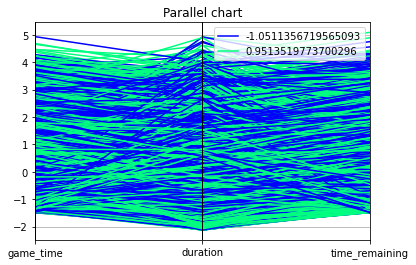

In [30]:
# Parallel coordinates chart

fig1 = plt.figure()
pd.plotting.parallel_coordinates(nc,
                                 'radiant_win',    # class_column
                                  colormap='winter'
                                  )
plt.title("Parallel chart")

Parallel coordinates plot

<AxesSubplot:>

Text(0.5, 1.0, 'Andrews plots')

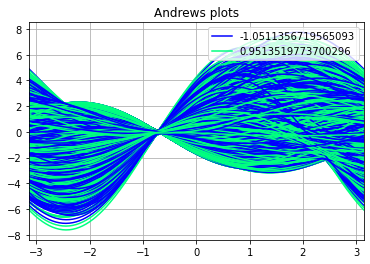

In [31]:
# Andrews charts 

fig2 = plt.figure()
pd.plotting.andrews_curves(nc,
                           'radiant_win',
                           colormap = 'winter')

plt.title("Andrews plots")

<AxesSubplot:>

Text(0.5, 1.0, 'Radviz plot')

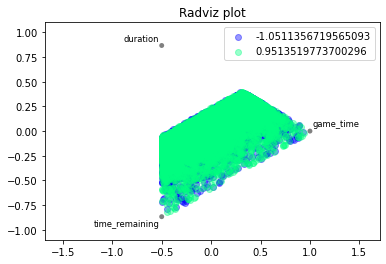

In [32]:
# Radviz plot

fig3 = plt.figure()
pd.plotting.radviz(nc,
                   class_column ='radiant_win',
                   colormap= plt.cm.winter,
                   alpha = 0.4
                   )

plt.title("Radviz plot")

#### Train Test Split and Data pipelining 

In [33]:
# Creating feature vector and target vector.

X = df_train_features.values
y = df_train_targets['radiant_win'].values

In [34]:
# Split dataset into train and validation parts

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.35,
                                                    shuffle = True,
                                                    stratify = y
                                                    )


X_train.shape        
X_test.shape         
y_train.shape       
y_test.shape  

(25788, 245)

(13887, 245)

(25788,)

(13887,)

In [51]:
#Creating pipeline
#Pipe using XGBoost

steps_xg = [('sts', ss() ),
            ('pca', PCA()),
            ('xg',  XGBClassifier(silent = False,
                                  n_jobs=3)      
            )
            ]

pipe_xg = Pipeline(steps_xg)

#### Grid Search code to discover best pipeline parameters

In [52]:
# Grid Search code to discover best pipeline parameters

print("\n\n--Which parameters can be tuned?--\n\n")
pipe_xg.get_params()



--Which parameters can be tuned?--




{'memory': None,
 'steps': [('sts', StandardScaler()),
  ('pca', PCA()),
  ('xg',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_bytree=None, early_stopping_rounds=None,
                 enable_categorical=False, eval_metric=None, gamma=None,
                 gpu_id=None, grow_policy=None, importance_type=None,
                 interaction_constraints=None, learning_rate=None, max_bin=None,
                 max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                 max_leaves=None, min_child_weight=None, missing=nan,
                 monotone_constraints=None, n_estimators=100, n_jobs=3,
                 num_parallel_tree=None, predictor=None, random_state=None,
                 reg_alpha=None, reg_lambda=None, ...))],
 'verbose': False,
 'sts': StandardScaler(),
 'pca': PCA(),
 'xg': XGBClassifier(base_score=None, booster=None, callbacks=None,
               c

In [53]:
# Deifne dictionary

parameters = {'xg__learning_rate':  [0.03, 0.05], 
              
              # learning rate decides what percentage
              #  of error is to be fitted by
              #   by next boosted tree.
              # Coefficients of boosted trees decide,
              #  in the overall model or scheme, how much importance
              #   each boosted tree shall have. Values of these
              #    Coefficients are calculated by modeling
              #     algorithm and unlike learning rate are
              #      not hyperparameters. These Coefficients
              #       get adjusted by l1 and l2 parameters 


              'xg__n_estimators':   [200,  300],
              
              # Number of boosted trees to fit 
              # l1 and l2 specifications will change
              # the values of coeff of boosted trees
              # but not their numbers
              
              'xg__max_depth':      [4,6],
              'pca__n_components' : [25,30],
              'xg__booster': ['gbtree','gblinear']
              }    

In [54]:
parameters = {'xg__learning_rate':  [0.03, 0.05],
               'xg__max_depth':      [4,6],
              
              #  of error is to be fitted by
              #   by next boosted tree.
              # Coefficients of boosted trees decide,
              #  in the overall model or scheme, how much importance
              #   each boosted tree shall have. Values of these
              #    Coefficients are calculated by modeling
              #     algorithm and unlike learning rate are
              #      not hyperparameters. These Coefficients
              #       get adjusted by l1 and l2 parameters
 
              'pca__n_components' : [200,245],
               }                             

In [55]:
#### Instantiating GridSearchCV class

clf = GridSearchCV(pipe_xg,            # pipeline object
                   parameters,         # possible parameters
                   n_jobs = 2,         # USe parallel cpu threads
                   cv =2 ,             # No of folds
                   verbose =1,         # Higher the value, more the verbosity
                   scoring = ['accuracy', 'roc_auc'],  # Metrics for performance
                   refit = 'roc_auc'   # Refitting final model on what parameters?
                                       # Those which maximise auc
                   )

In [56]:
# Start fitting pipeline to data

print("\n\n--Takes time...---\n")
start = time.time()
clf.fit(X_train, y_train)
end = time.time()
print()
(end - start)/60 



--Takes time...---

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[18:12:39] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('sts', StandardScaler()),
                                       ('pca', PCA()),
                                       ('xg',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                                      importance_type=None,
                                                      intera...
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=3,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None,
                                                      reg_alpha=None,
                                                      reg_lambda=None, ...))]),
             n_jobs=2,
             param_grid={'pca__n_components': [200, 245],
                         'xg__learning_rate': [0.03, 0.05],
                         'xg__max_depth': [4, 6]},
             refit='roc_auc', scoring=['accuracy', 'roc_auc'], verbose=1)

3.709893830617269

#### Performance Score

In [57]:
f"Best score: {clf.best_score_} "           

print()
f"Best parameter set {clf.best_params_}"

'Best score: 0.7986495795069111 '

"Best parameter set {'pca__n_components': 245, 'xg__learning_rate': 0.05, 'xg__max_depth': 6}"

--Few predictions--



array([1, 0, 0, 0])



--Accuracy Score--



71.24648952257508



--Confusion Matrix--



array([[4254, 2344],
       [1649, 5640]])



--F1 Score pos-label: 1--



0.738558240031428



--F1 Score pos-label: 0--



0.6805855531557476



--ROC curve--



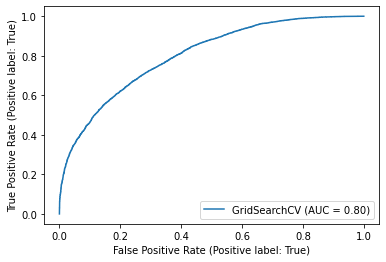

In [58]:
y_pred = clf.predict(X_test)
print("--Few predictions--\n")
y_pred[:4]

# 7.5 Accuracy score
print("\n\n--Accuracy Score--\n")
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100.0            

# 7.6 Confusion matrix
print("\n\n--Confusion Matrix--\n")
confusion_matrix( y_test,y_pred)

# 7.7 F1 score
print("\n\n--F1 Score pos-label: 1--\n")
f1_score(y_test,y_pred, pos_label = 1)    

print("\n\n--F1 Score pos-label: 0--\n")
f1_score(y_test,y_pred, pos_label = 0)     

# 7.8 ROC curve and get AUC
print("\n\n--ROC curve--\n")
_=plot_roc_curve(clf, X_test, y_test)

#### Feature Importance

In [59]:
# Get feature importances from GridSearchCV best fitted 'xg' model
print("\n\n--How many features--\n")
clf.best_estimator_.named_steps["xg"].feature_importances_.shape


print("\n\n---Feature importances---\n")
clf.best_estimator_.named_steps["xg"].feature_importances_



--How many features--



(245,)



---Feature importances---



array([0.00507528, 0.07436333, 0.00273582, 0.00412275, 0.0045376 ,
       0.00275251, 0.00405027, 0.0042772 , 0.0048908 , 0.00335675,
       0.00274436, 0.00360855, 0.00411172, 0.00387828, 0.00515908,
       0.0031906 , 0.00338784, 0.00317713, 0.00426435, 0.00430084,
       0.0038672 , 0.00446764, 0.00531783, 0.00411276, 0.00353649,
       0.00425837, 0.00580125, 0.00321051, 0.00413698, 0.00362137,
       0.00386321, 0.00291932, 0.00379462, 0.00274345, 0.00447695,
       0.00336518, 0.00313277, 0.00427158, 0.00322512, 0.00304111,
       0.00325334, 0.00388985, 0.00382106, 0.00360059, 0.00390792,
       0.00367648, 0.00395255, 0.00432914, 0.00574359, 0.00532884,
       0.00374615, 0.00387081, 0.00374196, 0.00278548, 0.00389239,
       0.00455933, 0.00366395, 0.00423305, 0.00311663, 0.00345822,
       0.00562978, 0.00429335, 0.00297307, 0.004013  , 0.00328528,
       0.00316197, 0.00429708, 0.00303491, 0.00545174, 0.00354584,
       0.0038494 , 0.00448014, 0.00290319, 0.00385833, 0.00388

In [60]:
X = df_train_features
X.head()

,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,r1_gold,r1_lh,r1_xp,r1_health,r1_max_health,r1_max_mana,r1_level,r1_x,r1_y,r1_stuns,r1_creeps_stacked,r1_camps_stacked,r1_rune_pickups,r1_firstblood_claimed,r1_teamfight_participation,r1_towers_killed,r1_roshans_killed,r1_obs_placed,r1_sen_placed,r2_hero_id,r2_kills,r2_deaths,r2_assists,r2_denies,r2_gold,r2_lh,r2_xp,r2_health,r2_max_health,r2_max_mana,r2_level,r2_x,r2_y,r2_stuns,r2_creeps_stacked,r2_camps_stacked,r2_rune_pickups,r2_firstblood_claimed,r2_teamfight_participation,r2_towers_killed,...,d3_obs_placed,d3_sen_placed,d4_hero_id,d4_kills,d4_deaths,d4_assists,d4_denies,d4_gold,d4_lh,d4_xp,d4_health,d4_max_health,d4_max_mana,d4_level,d4_x,d4_y,d4_stuns,d4_creeps_stacked,d4_camps_stacked,d4_rune_pickups,d4_firstblood_claimed,d4_teamfight_participation,d4_towers_killed,d4_roshans_killed,d4_obs_placed,d4_sen_placed,d5_hero_id,d5_kills,d5_deaths,d5_assists,d5_denies,d5_gold,d5_lh,d5_xp,d5_health,d5_max_health,d5_max_mana,d5_level,d5_x,d5_y,d5_stuns,d5_creeps_stacked,d5_camps_stacked,d5_rune_pickups,d5_firstblood_claimed,d5_teamfight_participation,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed
match_id_hash,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,155,22,7,1,11,11,0,0,0,0,543,7,533,358,600,350.93784,2,116,122,0.000000,0,0,1,0,0.000000,0,0,0,0,78,0,0,0,3,399,4,478,636,720,254.93774,2,124,126,0.000000,0,0,0,0,0.000000,0,...,0,0,84,1,0,0,0,796,0,421,760,760,326.93780,2,90,150,0.000000,0,0,2,1,1.0,0,0,1,0,34,0,0,0,0,851,11,870,593,680,566.93805,3,128,128,0.000000,0,0,0,0,0.00,0,0,0,0
b9c57c450ce74a2af79c9ce96fac144d,658,4,0,3,10,15,7,2,0,7,5257,52,3937,1160,1160,566.93805,8,76,78,0.000000,0,0,0,0,0.437500,0,0,0,0,96,3,1,2,3,3394,19,3897,1352,1380,386.93787,8,78,166,8.397949,0,0,4,0,0.312500,0,...,0,0,56,0,3,2,3,2808,18,2730,567,1160,410.93790,6,124,142,0.000000,0,0,6,0,0.5,0,0,0,0,92,0,2,0,1,1423,8,1136,800,800,446.93793,4,180,176,0.000000,0,0,0,0,0.00,0,0,0,0
6db558535151ea18ca70a6892197db41,21,23,0,0,0,101,0,0,0,0,176,0,0,680,680,506.93800,1,118,118,0.000000,0,0,0,0,0.000000,0,0,0,0,51,0,0,0,0,176,0,0,720,720,278.93777,1,156,104,0.000000,0,0,0,0,0.000000,0,...,0,0,40,0,0,0,0,96,0,0,600,600,302.93777,1,176,110,0.000000,0,0,0,0,0.0,0,0,0,0,17,0,0,0,0,96,0,0,640,640,446.93793,1,162,162,0.000000,0,0,0,0,0.00,0,0,0,0
46a0ddce8f7ed2a8d9bd5edcbb925682,576,22,7,1,4,14,1,0,3,1,1613,0,1471,900,900,290.93777,4,170,96,2.366089,0,0,5,0,0.571429,0,0,0,0,99,1,0,1,2,2816,30,3602,878,1100,494.93796,8,82,154,0.000000,0,0,1,0,0.285714,0,...,0,0,69,0,2,0,0,2004,16,1644,1160,1160,386.93787,4,176,100,4.998863,0,0,2,0,0.0,0,0,0,0,86,0,1,0,1,1333,2,1878,630,740,518.93800,5,82,160,8.664527,3,1,3,0,0.00,0,0,2,0
b1b35ff97723d9b7ade1c9c3cf48f770,453,22,7,1,3,42,0,1,1,0,1404,9,1351,1000,1000,338.93784,4,80,164,9.930903,0,0,4,0,0.500000,0,0,0,0,69,1,0,0,0,1840,14,1693,868,1000,350.93784,5,78,166,1.832892,0,0,0,1,0.500000,0,...,0,0,72,2,1,0,0,1697,12,1651,680,680,374.93787,4,176,108,13.596678,0,0,2,0,0.5,0,0,0,0,1,0,1,1,8,2199,32,1919,692,740,302.93777,5,104,162,0.000000,2,1,2,0,0.25,0,0,0,0


In [61]:
colnames = X.columns.tolist()

In [62]:
# Create a dataframe of feature importances

imp_values = clf.best_estimator_.named_steps["xg"].feature_importances_

df_imp = pd.DataFrame(
                      data = imp_values,
                      index = colnames,
                      columns = ["imp"]
                      ).sort_values(by = 'imp')

# 7.10.1
df_imp

,imp
d1_deaths,0.002256
d1_camps_stacked,0.002302
d1_firstblood_claimed,0.002327
d5_xp,0.002453
d2_stuns,0.002494
...,...
d4_kills,0.006002
d3_gold,0.006018
r5_towers_killed,0.006267
d5_sen_placed,0.008474


In [63]:
#  First five columns with least feature importance are:
list(df_imp.index.values[:5])

['d1_deaths', 'd1_camps_stacked', 'd1_firstblood_claimed', 'd5_xp', 'd2_stuns']

#### Random Search code to discover best pipeline parameters

In [64]:
# Tune parameters using randomized search
# Hyperparameters to tune and their ranges

parameters = {'xg__learning_rate':  uniform(0, 1),
              'xg__n_estimators':   range(50,300),
              'xg__max_depth':      range(3,10),
              'pca__n_components' : range(20,30)}

In [65]:
# Instantiate RandomSearchCV class

rs = RandomizedSearchCV(
                          pipe_xg,
                          param_distributions=parameters,
                          scoring= ['roc_auc', 'accuracy'],
                          n_iter=4,           # Max combination of
                                              # parameter to try. Default = 10
                          verbose = 1,
                          refit = 'roc_auc',
                          n_jobs = 2,          # Use parallel cpu threads
                          cv = 2               # No of folds.
                                              # So n_iter * cv combinations
                        )


In [66]:
# Start training RandomSearchCV object

start = time.time()
rs.fit(X_train, y_train)
end = time.time()
print()
(end - start)/60  


Fitting 2 folds for each of 4 candidates, totalling 8 fits
[18:14:15] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('sts', StandardScaler()),
                                             ('pca', PCA()),
                                             ('xg',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric=None,
                                                            gamma=None,
                                                            gpu_id=None,
                                                            grow_policy=None,
                                                            importance_type=None,...
                                                            predictor=None,
                                                            random_state=None,
                                                            reg_alpha=None,
                                                            reg_lambda=None, ...))]),
                   n_iter=4, n_jobs=2,
                   param_distributions={'pca__n_components': range(20, 30),
                                        'xg__learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9a002b2f10>,
                                        'xg__max_depth': range(3, 10),
                                        'xg__n_estimators': range(50, 300)},
                   refit='roc_auc', scoring=['roc_auc', 'accuracy'], verbose=1)

0.2853196144104004

#### Performance Score

In [67]:
# Evaluate
f"Best score: {rs.best_score_} " ;print()           
f"Best parameter set: {rs.best_params_} " ; print()


# Make predictions from the best returned model
y_pred = rs.predict(X_test)


# Accuracy and f1_score
accuracy = accuracy_score(y_test, y_pred)
f"Accuracy: {accuracy * 100.0}"   ; print()      
f"f1 score: {f1_score(y_test,y_pred, pos_label = 1)}" ; print()    


'Best score: 0.7842767808193356 '

"Best parameter set: {'pca__n_components': 20, 'xg__learning_rate': 0.008223701213859402, 'xg__max_depth': 4, 'xg__n_estimators': 97} "

'Accuracy: 70.1375387052639'

'f1 score: 0.7284750867544032'

#### Cross Validation

In [68]:
# Cross-validation is a more reliable validation technique than just one train/test split. 
# Here we'll resort to ShuffleSplit to create 5 70%/30% splits

from sklearn.model_selection import ShuffleSplit, KFold
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=17)

In [69]:
from sklearn.model_selection import cross_val_score


In [70]:
#We'll train 2 versions of the RandomForestClassifier model - first with default capacity (trees are not limited in depth), 
#second - with min_samples_leaf=3, i.e. each leave is obliged to have at least 3 instances.
#%%time

model_rf1 = RandomForestClassifier(n_estimators=100, n_jobs=4,
                                   max_depth=None, random_state=17)

# calcuate ROC-AUC for each split
cv_scores_rf1 = cross_val_score(model_rf1, X, y, cv=cv, scoring='roc_auc')

CPU times: user 2.72 s, sys: 1.06 s, total: 3.79 s
Wall time: 29.8 s


In [71]:
%%time

model_rf2 = RandomForestClassifier(n_estimators=100, n_jobs=4,
                                   min_samples_leaf=3, random_state=17)

cv_scores_rf2 = cross_val_score(model_rf2, X, y, cv=cv, 
                                scoring='roc_auc', n_jobs=-1)

CPU times: user 67.4 ms, sys: 150 ms, total: 218 ms
Wall time: 18 s


In [72]:
#The result returned by cross_val_score is an array with metric values (ROC-AUC) for each split:

cv_scores_rf1

array([0.77723183, 0.78656801, 0.78004904, 0.77732062, 0.77669984])

In [73]:
cv_scores_rf2


array([0.78326357, 0.78474771, 0.78343116, 0.77761305, 0.78531686])

In [74]:
#compare average ROC-AUC among all splits for both models.

print('Model 1 mean score:', cv_scores_rf1.mean())
print('Model 2 mean score:', cv_scores_rf2.mean())

Model 1 mean score: 0.7795738699757455
Model 2 mean score: 0.7828744711333723


In [75]:
# The second model is preferred
# the second model is actually better for 4 splits out of 5
# there would've been a 20% probability to make a wrong conclusion that the first model is better.

cv_scores_rf2 > cv_scores_rf1


array([ True, False,  True,  True,  True])